# Example educational Notebook
### about K-means clustering 

<div class="alert alert-info">
<hr>
Information describing the notebook system itself will be available in such colored cells.  
Per default, there are 4 different possible colors for cells `alert-warning`, `alert-success`, `alert-info` or `alert-danger`.
<hr>
</div>

In [3]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from IPython.lib.display import YouTubeVideo
from ipywidgets import interact
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
# Generate some data
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.8, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

k-Means uses a pre-determined number of clusters within the multidimensional dataset. Within our example data above, that dimension would be 2. And we know that we have three clusters. Optimal clustering by k-Means is achieved by following two basic principles:
* The center of a cluster equals the arithmetic mean of all the points belonging to the cluster.
* The distance between each point and its cluster center must be shorter than to other cluster centers.

This is achieved by using the *expectation-maximization* algorithm which basically is:
1. Guess some initial cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 
In the *expectation step* we update the clustering, e.g. we *expect* that point x belongs to cluster P. The *maximization step* then applies some fitness function for assessing the cluster centers (in this case the mean of all points belonging to a cluster).  

<div class="alert alert-info">
<hr>
The small `+` sign in the upper left corner indicates, that more cells are available and at the current state hidden from the user. By clicking the `+` sign, the user can expand the hidden cells. This is a convenient method for including additional explanations, links, and other media.
<hr>
</div>

The main disadvantage of the k-Means algorithm is its circular clustering. If the data is obviously not circularly clustered, k-Means yields a poor fit. There are methods to mitigate that (like a [principle component analysis](ftp://statgen.ncsu.edu/pub/thorne/molevoclass/AtchleyOct19.pdf) behavior to an extent, but do not guarantee success.  

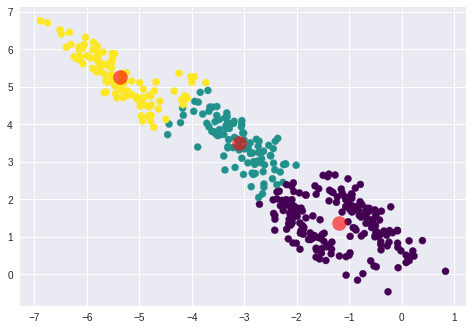

In [2]:
# stretch the clusters
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
# now we create an instance of the KMeans class
from sklearn.cluster import KMeans
nr_of_clusters = 3                               # because we see 3 clusters in the plot above
kmeans_inst = KMeans(n_clusters= nr_of_clusters) # create the instance kmeans_inst
kmeans_inst.fit(X_stretched)                               # apply a method to the instance
y_predict = kmeans_inst.predict(X_stretched)               # apply another method to the instance and save it in another variable

# lets plot the predicted cluster centers colored in the cluster color
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=y_predict, s=50, cmap='viridis')
centers = kmeans_inst.cluster_centers_           # apply the method to find the new centers of the determined clusters
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.6); # plot the cluster centers

<div class="alert alert-warning">
<hr>
For more information on the K-means model, you can visit Jake VanderPlas great [explanation](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html), which is also the basis for this notebook.  
Additionally, K-means clustering is nicely explained in this video:  
<hr>
</div>

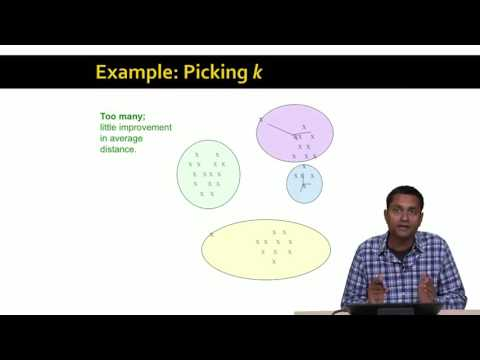

In [3]:
YouTubeVideo('RD0nNK51Fp8')

<div class="alert alert-info">
<hr>
Jupyter Notebooks enable also media such as pictures and videos to be directly included in the document using existing libraries, or HTML commands. That makes Jupyter Notebooks highly versatile.
<hr>
</div>

In [4]:
# Possibility for code-folding
def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=0.60)
        
    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                    vmin=0, vmax=n_clusters - 1);
            
    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(centers.shape[0]),
                    s=200, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=50)
            

    def _kmeans_step(frame=0, n_clusters=4):
        rng = np.random.RandomState(2)
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, 2)

        nsteps = int(frame // 3)

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(0)
                                    for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers
        plt.figure(figsize=(8,8))
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i], 
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if frame % 3 == 1:
            plt.text(3.8, 9.5, "1. Reassign points to nearest centroid",
                     ha='right', va='top', size=14)
        elif frame % 3 == 2:
            plt.text(3.8, 9.5, "2. Update centroids to cluster means",
                     ha='right', va='top', size=14)
        plt.show()
    
    return interact(_kmeans_step, frame=(0, 20),
                    n_clusters=(min_clusters, max_clusters))

plot_kmeans_interactive();

<div class="alert alert-info">
<hr> 
Sliders, buttons, or text boxes can be displayed by code, while the code itself remains hidden. This enables the possibility to teach concepts interactively on a high-level, without showing the underlying code. However, students can also easily inspect the code by clicking the **triangle** in folded code boxes. Additionally, Jupyter Notebooks provide an extension for hiding all code cells. Once enabled, the extension is represented by a button showing an eye in the toolbox.
<hr>
</div>